# Using Correlation to Decide Which Features to Retain 

In [122]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [123]:
df=pd.read_csv("breast.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Drop Irrelevant columns

In [124]:
list = ['Unnamed: 32','id','diagnosis'] 
df = df.drop(list,axis = 1) ## dropping columns
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
df.select_dtypes(include='number').corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

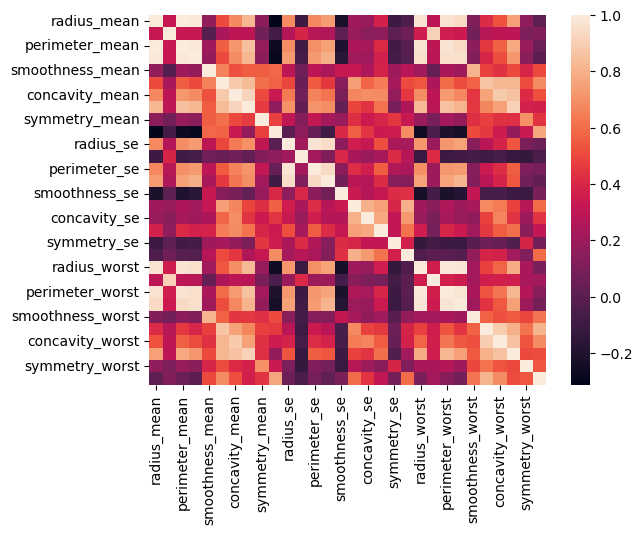

In [126]:
sns.heatmap(df.select_dtypes(include='number').corr())

In [127]:
df.select_dtypes(include='number').corr()['radius_mean']

radius_mean                1.000000
texture_mean               0.323782
perimeter_mean             0.997855
area_mean                  0.987357
smoothness_mean            0.170581
compactness_mean           0.506124
concavity_mean             0.676764
concave points_mean        0.822529
symmetry_mean              0.147741
fractal_dimension_mean    -0.311631
radius_se                  0.679090
texture_se                -0.097317
perimeter_se               0.674172
area_se                    0.735864
smoothness_se             -0.222600
compactness_se             0.206000
concavity_se               0.194204
concave points_se          0.376169
symmetry_se               -0.104321
fractal_dimension_se      -0.042641
radius_worst               0.969539
texture_worst              0.297008
perimeter_worst            0.965137
area_worst                 0.941082
smoothness_worst           0.119616
compactness_worst          0.413463
concavity_worst            0.526911
concave points_worst       0

# Filter Out Features with r => 0.5

In [128]:
df.select_dtypes(include='number').corr()['radius_mean'].abs() > .5

radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                   True
texture_se                 False
perimeter_se                True
area_se                     True
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst          False
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_dimension_worst    False
Name: radi

# Recursive Feature Elemination (RFE)

In [129]:
breast = pd.read_csv("breast.csv")
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [130]:
y = breast["diagnosis"]
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

# Drop Irrelevant columns

In [131]:
list = ['Unnamed: 32','id','diagnosis']
x = breast.drop(list,axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Recursive Feature Elimination (RFE) with a Random Forest classifier to select the top features from a dataset.
# Initialize the Random Forest Classifier

In [132]:
estimator = RandomForestClassifier(random_state=42)

# Initialize RFE
# We want to select the top 5 Xs (features)

In [133]:
rfe = RFE(estimator=estimator, n_features_to_select=5, step=1)

## Recursive feature elimination
## we want to select the top 5 Xs

In [134]:
rfe = rfe.fit(x,y)
print("RFE fitted")
print(rfe)

RFE fitted
RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)


# Create a DataFrame to display the ranking results
# Make sure 'x' has a 'columns' attribute (e.g., it's a pandas DataFrame)

In [135]:
rfe_result = pd.DataFrame({
    'Feature': x.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

print("RFE Results:\n", rfe_result)

RFE Results:
                     Feature  Ranking  Selected
0               radius_mean        8     False
1              texture_mean       10     False
2            perimeter_mean        2     False
3                 area_mean        4     False
4           smoothness_mean       15     False
5          compactness_mean       14     False
6            concavity_mean        6     False
7       concave points_mean        1      True
8             symmetry_mean       25     False
9    fractal_dimension_mean       26     False
10                radius_se       12     False
11               texture_se       24     False
12             perimeter_se       17     False
13                  area_se        9     False
14            smoothness_se       20     False
15           compactness_se       19     False
16             concavity_se       18     False
17        concave points_se       22     False
18              symmetry_se       21     False
19     fractal_dimension_se       23     False

# Sort by ranking (the best has ranking = 1)

In [136]:
rfe_result_sorted = rfe_result.sort_values(by='Ranking')
print("\nTop 5 Features Based on RFE Ranking:")
print(rfe_result_sorted.head(5))


Top 5 Features Based on RFE Ranking:
                 Feature  Ranking  Selected
7    concave points_mean        1      True
20          radius_worst        1      True
23            area_worst        1      True
22       perimeter_worst        1      True
27  concave points_worst        1      True


# Best Selected Features

In [137]:
x_selected_rfe = x.loc[:, rfe.support_]
selected_columns_rfe = x.columns[rfe.support_]
print("\nBest selected RFE Features:", selected_columns_rfe.tolist())


Best selected RFE Features: ['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
